Import the necessary libraries as:

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns

Now lets prepare the data and perform Data Cleaning.

In [3]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Perform Data Cleaning as shown in the function below. Keep in mind that this function only appeals to the 'titanic.csv' data file

In [5]:
def DataCleaning(data):
    #Here this data is specific to the 'titanic.csv' dataset and shall be of the form of a panda table.
    #We shall see that the PassengerId is unique for the data.

    #First step towards cleaning is to remove all the unnecessary columns this includes the 'PassengerId', the 'Name', the 'Ticket', the 'Cabin'
    #and the 'Embarked'.

    #We understand that 'PassengerId' or 'Name' or 'Ticket' do not really affect the survival level of a person. The 'Cabin' and 'Embarked' columns
    #have a lot of NaN values which might lead to a difficulty in predicting and hence are being removed.

    data = data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)

    #Now change the values under data.Sex represented as strings to actual classes where 'male' refers to 0 and 'female' refers to 1.

    data.Sex = data.Sex.replace("male",0)
    data.Sex = data.Sex.replace("female",1)

    #We also see that a few entries of Age are represented as NaN and we might want to remove such entries.

    ind = [i for i,val in enumerate(data.Age) if math.isnan(val)]
    data = data.drop(ind)

    #We might want to collect the output variable as Y.

    Y=[]
    if 'Survived' in data:
        Y = data.Survived.values
        data = data.drop('Survived',axis=1)
    
    return data,Y,ind

In [6]:
df_train,Y,i_ = DataCleaning(df_train)
df_test,y,i_t = DataCleaning(df_test)
print(df_train)
print(df_test) #Datasets after cleaning

     Pclass  Sex   Age  SibSp  Parch     Fare
0         3    0  22.0      1      0   7.2500
1         1    1  38.0      1      0  71.2833
2         3    1  26.0      0      0   7.9250
3         1    1  35.0      1      0  53.1000
4         3    0  35.0      0      0   8.0500
..      ...  ...   ...    ...    ...      ...
885       3    1  39.0      0      5  29.1250
886       2    0  27.0      0      0  13.0000
887       1    1  19.0      0      0  30.0000
889       1    0  26.0      0      0  30.0000
890       3    0  32.0      0      0   7.7500

[714 rows x 6 columns]
     Pclass  Sex   Age  SibSp  Parch      Fare
0         3    0  34.5      0      0    7.8292
1         3    1  47.0      1      0    7.0000
2         2    0  62.0      0      0    9.6875
3         3    0  27.0      0      0    8.6625
4         3    1  22.0      1      1   12.2875
..      ...  ...   ...    ...    ...       ...
409       3    1   3.0      1      1   13.7750
411       1    1  37.0      1      0   90.0000
4

Now prepare the true output value that is obtained from the 'gender_submission.csv' file.

In [7]:
t_o = pd.read_csv('gender_submission.csv')
t_o = t_o.drop(i_t) #Some entries have been removed owing to the presence of Nan in the Age Column.
t_o = t_o.Survived.values
print(t_o)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0]


We observe that few columns of the data prepared have discrete values while some columns like 'Age' and 'Fare' seem continuous and random in nature. Let us now look at the distributions of such columns.

<AxesSubplot:>

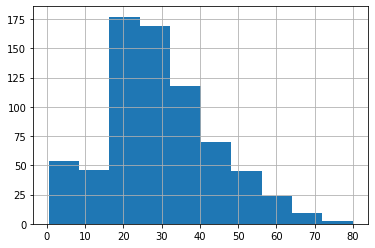

In [8]:
df_train.Age.hist()

<AxesSubplot:>

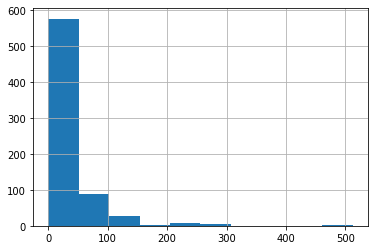

In [9]:
df_train.Fare.hist()

We see that these distributions are not Gaussian in nature nor are they close to it. So we shall treat them to be discrete and continue with our algorithm of Naive Bayes as follows:

In [19]:
class NaiveBayesClassifier:
    def __init__(self):
        self.prior_prob = {}
        self.class_feature_counts = {}
        self.class_counts = {}
        self.unique_values = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)

        for label in self.classes:
            X_label = X[y == label]
            self.prior_prob[label] = X_label.shape[0] / n_samples
            self.class_counts[label] = X_label.shape[0]

            self.class_feature_counts[label] = {}
            self.unique_values[label] = {}

            for feature in range(n_features):
                values = np.unique(X_label[:, feature])
                self.unique_values[label][feature] = values
                self.class_feature_counts[label][feature] = {}

                for value in values:
                    self.class_feature_counts[label][feature][value] = np.sum(X_label[:, feature] == value)

    def predict(self, X):
        y_pred = []
        for sample in X:
            probabilities = {}
            for label in self.classes:
                likelihood = self.prior_prob[label]
                for feature, value in enumerate(sample):
                    if value in self.unique_values[label][feature]:
                        likelihood *= (self.class_feature_counts[label][feature][value] + 1) / (self.class_counts[label] + len(self.unique_values[label][feature]))
                probabilities[label] = likelihood

            y_pred.append(max(probabilities, key=probabilities.get))

        return y_pred

Now apply the above model to the data prepared to get the final output.

In [20]:
Model = NaiveBayesClassifier()
type(Model)

__main__.NaiveBayesClassifier

In [21]:
Model.fit(np.array(df_train),np.array(Y))
output = Model.predict(np.array(df_test))
print(output)

[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0]


Now let us check the accuracy of our Model.

In [24]:
Acc = np.sum(t_o == output)/len(t_o)
Acc = Acc*100
print(f"The Accuracy of the given model is {Acc} %.")

The Accuracy of the given model is 69.27710843373494 %.


We see that the Accuracy is close to 69.2%. Now let us attempt at drawing the confusion matrix to further analyse our findings.

In [25]:
from sklearn.metrics import confusion_matrix

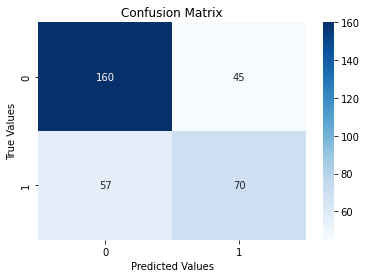

In [26]:
import matplotlib.pyplot as plt

C_M = confusion_matrix(t_o,output) #Creates the Confusion Matrix
sns.heatmap(C_M,annot=True,cmap='Blues',fmt='d') #HeatMap

plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

We see that a good amount of data rests in the diagonals and especially the ones where the crew dont make it seems to be very accurately predicted as compared with the other results.